In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Loading data
def get_data(line):
    parts = line.strip().split()
    label = int(parts[0])
    features = {int(k): float(v) for k, v in (b.split(':') for b in parts[1:])}
    return {'label': label, **features}

with open('/content/drive/MyDrive/Deep Learning/diabetes_scale.txt', 'r') as f:
    data = [get_data(line) for line in f]

# Converting to dataframe
df = pd.DataFrame(data).fillna(0)

df.head()


,label,1,2,3,4,5,6,7,8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [19]:
# Splitting data into feature and target
X = df.drop('label', axis=1).values
y = df['label'].values
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [20]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        # Constructor method
        self.weights = np.zeros(input_size + 1)
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.accuracies = []

    def activation_function(self, weighted_sum):
        # Step function
        return np.where(weighted_sum >= 0, 1, -1)

    def weighted_sum(self, inputs):
        # Calculation weighted sum
        return np.dot(inputs, self.weights[1:]) + self.weights[0]

    def prediction(self, inputs):
        # Making prediction
        sum = self.weighted_sum(inputs)
        return self.activation_function(sum)

    def update_weights(self, inputs, error):
        # Updating the weights
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                pred = self.prediction(inputs)
                error = label - pred
                self.update_weights(inputs, error)

            # Calculate accuracy for the epoch
            y_pred_epoch = np.array([self.prediction(inputs) for inputs in training_inputs])
            accuracy = accuracy_score(labels, y_pred_epoch)
            self.accuracies.append(accuracy)

In [21]:
perceptron = Perceptron(input_size=X.shape[1])
perceptron.train(X, y)

# Accuracy of the model
y_pred = np.array([perceptron.prediction(inputs) for inputs in X])
final_accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {final_accuracy * 100:.2f}%")

Accuracy: 72.14%


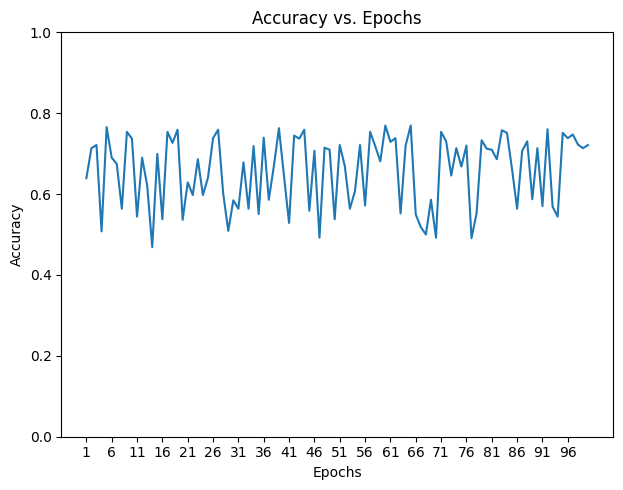

In [22]:
# Plotting accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, perceptron.epochs + 1), perceptron.accuracies, label='Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(np.arange(1, perceptron.epochs + 1, step=5))
plt.tight_layout()
plt.show()